In [8]:
import pandas as pd
import numpy as np
import time
import matplotlib.pyplot as plt
%matplotlib inline

In [5]:
df=pd.read_csv('BTC_price_history.csv',usecols=[0,4,6],names=['time', 'open', 'close'])
df.head(n=5)

,time,open,close
0,1417411980,300.0,300.0
1,1417412400,300.0,300.0
2,1417415040,370.0,370.0
3,1417416600,370.0,370.0
4,1417498140,377.0,377.0


In [25]:
df['time']=pd.to_datetime(df['time'],unit ='s')
df['price']=(df['open']+df['close'])/2
data=df.set_index(['time'],drop=True)
data=data.price
data.head(n=10)

time
2014-12-01 05:33:00    300.0000
2014-12-01 05:40:00    300.0000
2014-12-01 06:24:00    370.0000
2014-12-01 06:50:00    370.0000
2014-12-02 05:29:00    377.0000
2014-12-02 10:59:00    377.9375
2014-12-02 11:04:00    378.0000
2014-12-02 11:05:00    378.0000
2014-12-02 18:43:00    378.0000
2014-12-02 18:58:00    378.0000
Name: price, dtype: float64

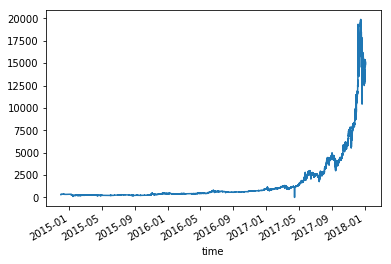

In [26]:
data.plot(y='price')

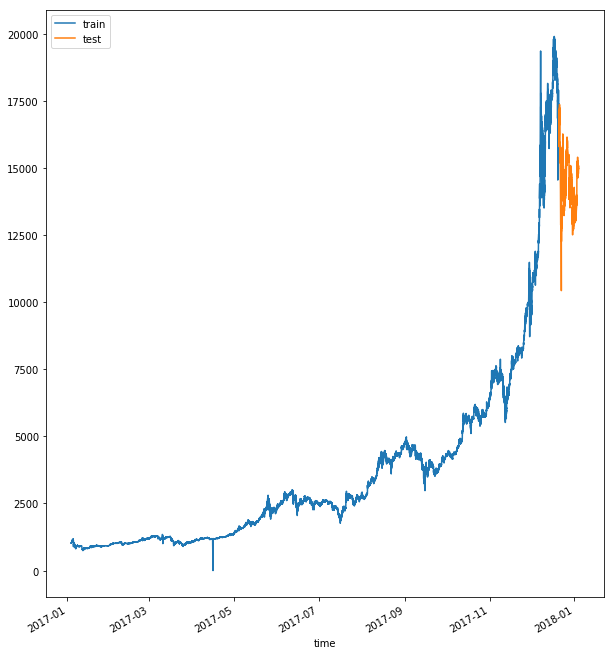

In [32]:
start_time=pd.Timestamp('2017-01-03 21:59:00')
split_time=pd.Timestamp('2017-12-20 21:59:00')
train=data.loc[start_time:split_time]
test=data.loc[split_time:]

ax=train.plot(figsize=(10,12))
test.plot(ax=ax)
plt.legend(['train','test'])
plt.show()

In [48]:
test_norm=(test-test.min())/(test.max()-test.min())
train_norm=(train-train.min())/(train.max()-train.min())

In [77]:
train_norm_df=pd.DataFrame(train_norm,index=train.index,dtype=np.float64)
test_norm_df=pd.DataFrame(test_norm,index=test.index,dtype=np.float64
                         )
for s in range(1,2):
    train_norm_df['X_{}'.format(s)]=train_norm_df['price'].shift(s)
    test_norm_df['X_{}'.format(s)]=test_norm_df['price'].shift(s)
    
X_train=train_norm_df.dropna().drop('price',axis=1).values
y_train=train_norm_df.dropna().drop('X_1',axis=1).values
X_test=test_norm_df.dropna().drop('price',axis=1).values
y_test=test_norm_df.dropna().drop('X_1',axis=1).values



In [78]:
from sklearn.svm import SVR
svr=SVR(kernel='rbf')
svr.fit(X_train,y_train)
y_pred=svr.predict(X_test)

/usr/local/miniconda3/envs/py37/lib/python3.6/site-packages/sklearn/utils/validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


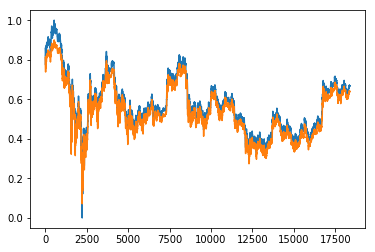

In [80]:
plt.plot(y_test)
plt.plot(y_pred)

In [81]:
from sklearn.metrics import r2_score
print('R-Squared %f' %r2_score(y_test,y_pred))

R-Squared 0.940565


In [86]:
from keras.models import Sequential
from keras.layers import Dense,Dropout
from keras.optimizers import Adam
import keras.backend as K

In [85]:
pwd

'/Users/user/Documents/LSTM-Neural-Network-for-Time-Series-Prediction'

In [84]:
K.clear_session()
model=Sequential()
model.add(Dense(1,input_shape=(X_test.shape[1],),activation='relu'))
model.add(Dropout(0.2))
model.compile(optimizer=Adam(lr=1e-3),loss='mean_squared_error')
model.fit(X_train,y_train,batch_size=16,epochs=20,verbose=1)


Epoch 1/20
210032/452952 [============>.................] - ETA: 17s - loss: 5.9100e-04

KeyboardInterrupt: 

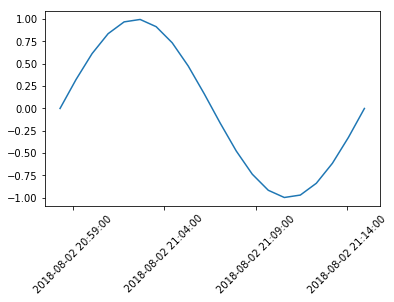

In [12]:
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib.dates as md
import numpy as np
import datetime as dt
import time
n=20
duration=1000
now=time.mktime(time.localtime())#get now time 's timestamp
timestamps=np.linspace(now,now+duration,n)
dates=[dt.datetime.fromtimestamp(ts) for ts in timestamps]
values=np.sin((timestamps-now)/duration*2*np.pi)
plt.subplots_adjust(bottom=0.2)
plt.xticks( rotation=45 )
ax=plt.gca()
xfmt = md.DateFormatter('%Y-%m-%d %H:%M:%S')
ax.xaxis.set_major_formatter(xfmt)
plt.plot(dates,values)
plt.show()

In [13]:


n=20
duration=1000
timestamps=df['time'].values.tolist()
values=df['volume'].values.tolist()
dates=[dt.datetime.fromtimestamp(ts) for ts in timestamps]
datenums=md.date2num(dates)
plt.subplots_adjust(bottom=0.2)
plt.xticks( rotation=25 )
ax=plt.gca()
xfmt = md.DateFormatter('%Y-%m-%d %H:%M:%S')
ax.xaxis.set_major_formatter(xfmt)
plt.plot(datenums,values)
plt.show()

TypeError: an integer is required (got type str)

In [ ]:
timestamps[0],timestamps[-1]

In [ ]:
dt.datetime.fromtimestamp(timestamps[0]).strftime('%Y/%m/%d-%H/%M/%S')

In [ ]:
time.mktime(time.localtime())

In [ ]:
time.localtime()

In [6]:
!python run.py

  File "run.py", line 52
    mse=((predictions-y_test)**2).mean()
                                       ^
IndentationError: unindent does not match any outer indentation level
